## 07 MULTIPLE LINEAR REGRESSION 

##### Assignment Task:
- Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


##### Dataset Description:
- The dataset consists of the following variables:
- Age: Age in years
- KM: Accumulated Kilometers on odometer
- FuelType: Fuel Type (Petrol, Diesel, CNG)
- HP: Horse Power
- Automatic: Automatic ( (Yes=1, No=0)
- CC: Cylinder Volume in cubic centimeters
- Doors: Number of doors
- Weight: Weight in Kilograms
- Quarterly_Tax: 
- Price: Offer Price in EUROs


##### Tasks:
- 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

In [1]:
#Import Libraries 
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv") #Load Dataset
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.info() #Info Of dataset and check Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Using Label Encoder TO handle categorical Features

In [5]:
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type']) #Encoding Categorical Variable 

In [6]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


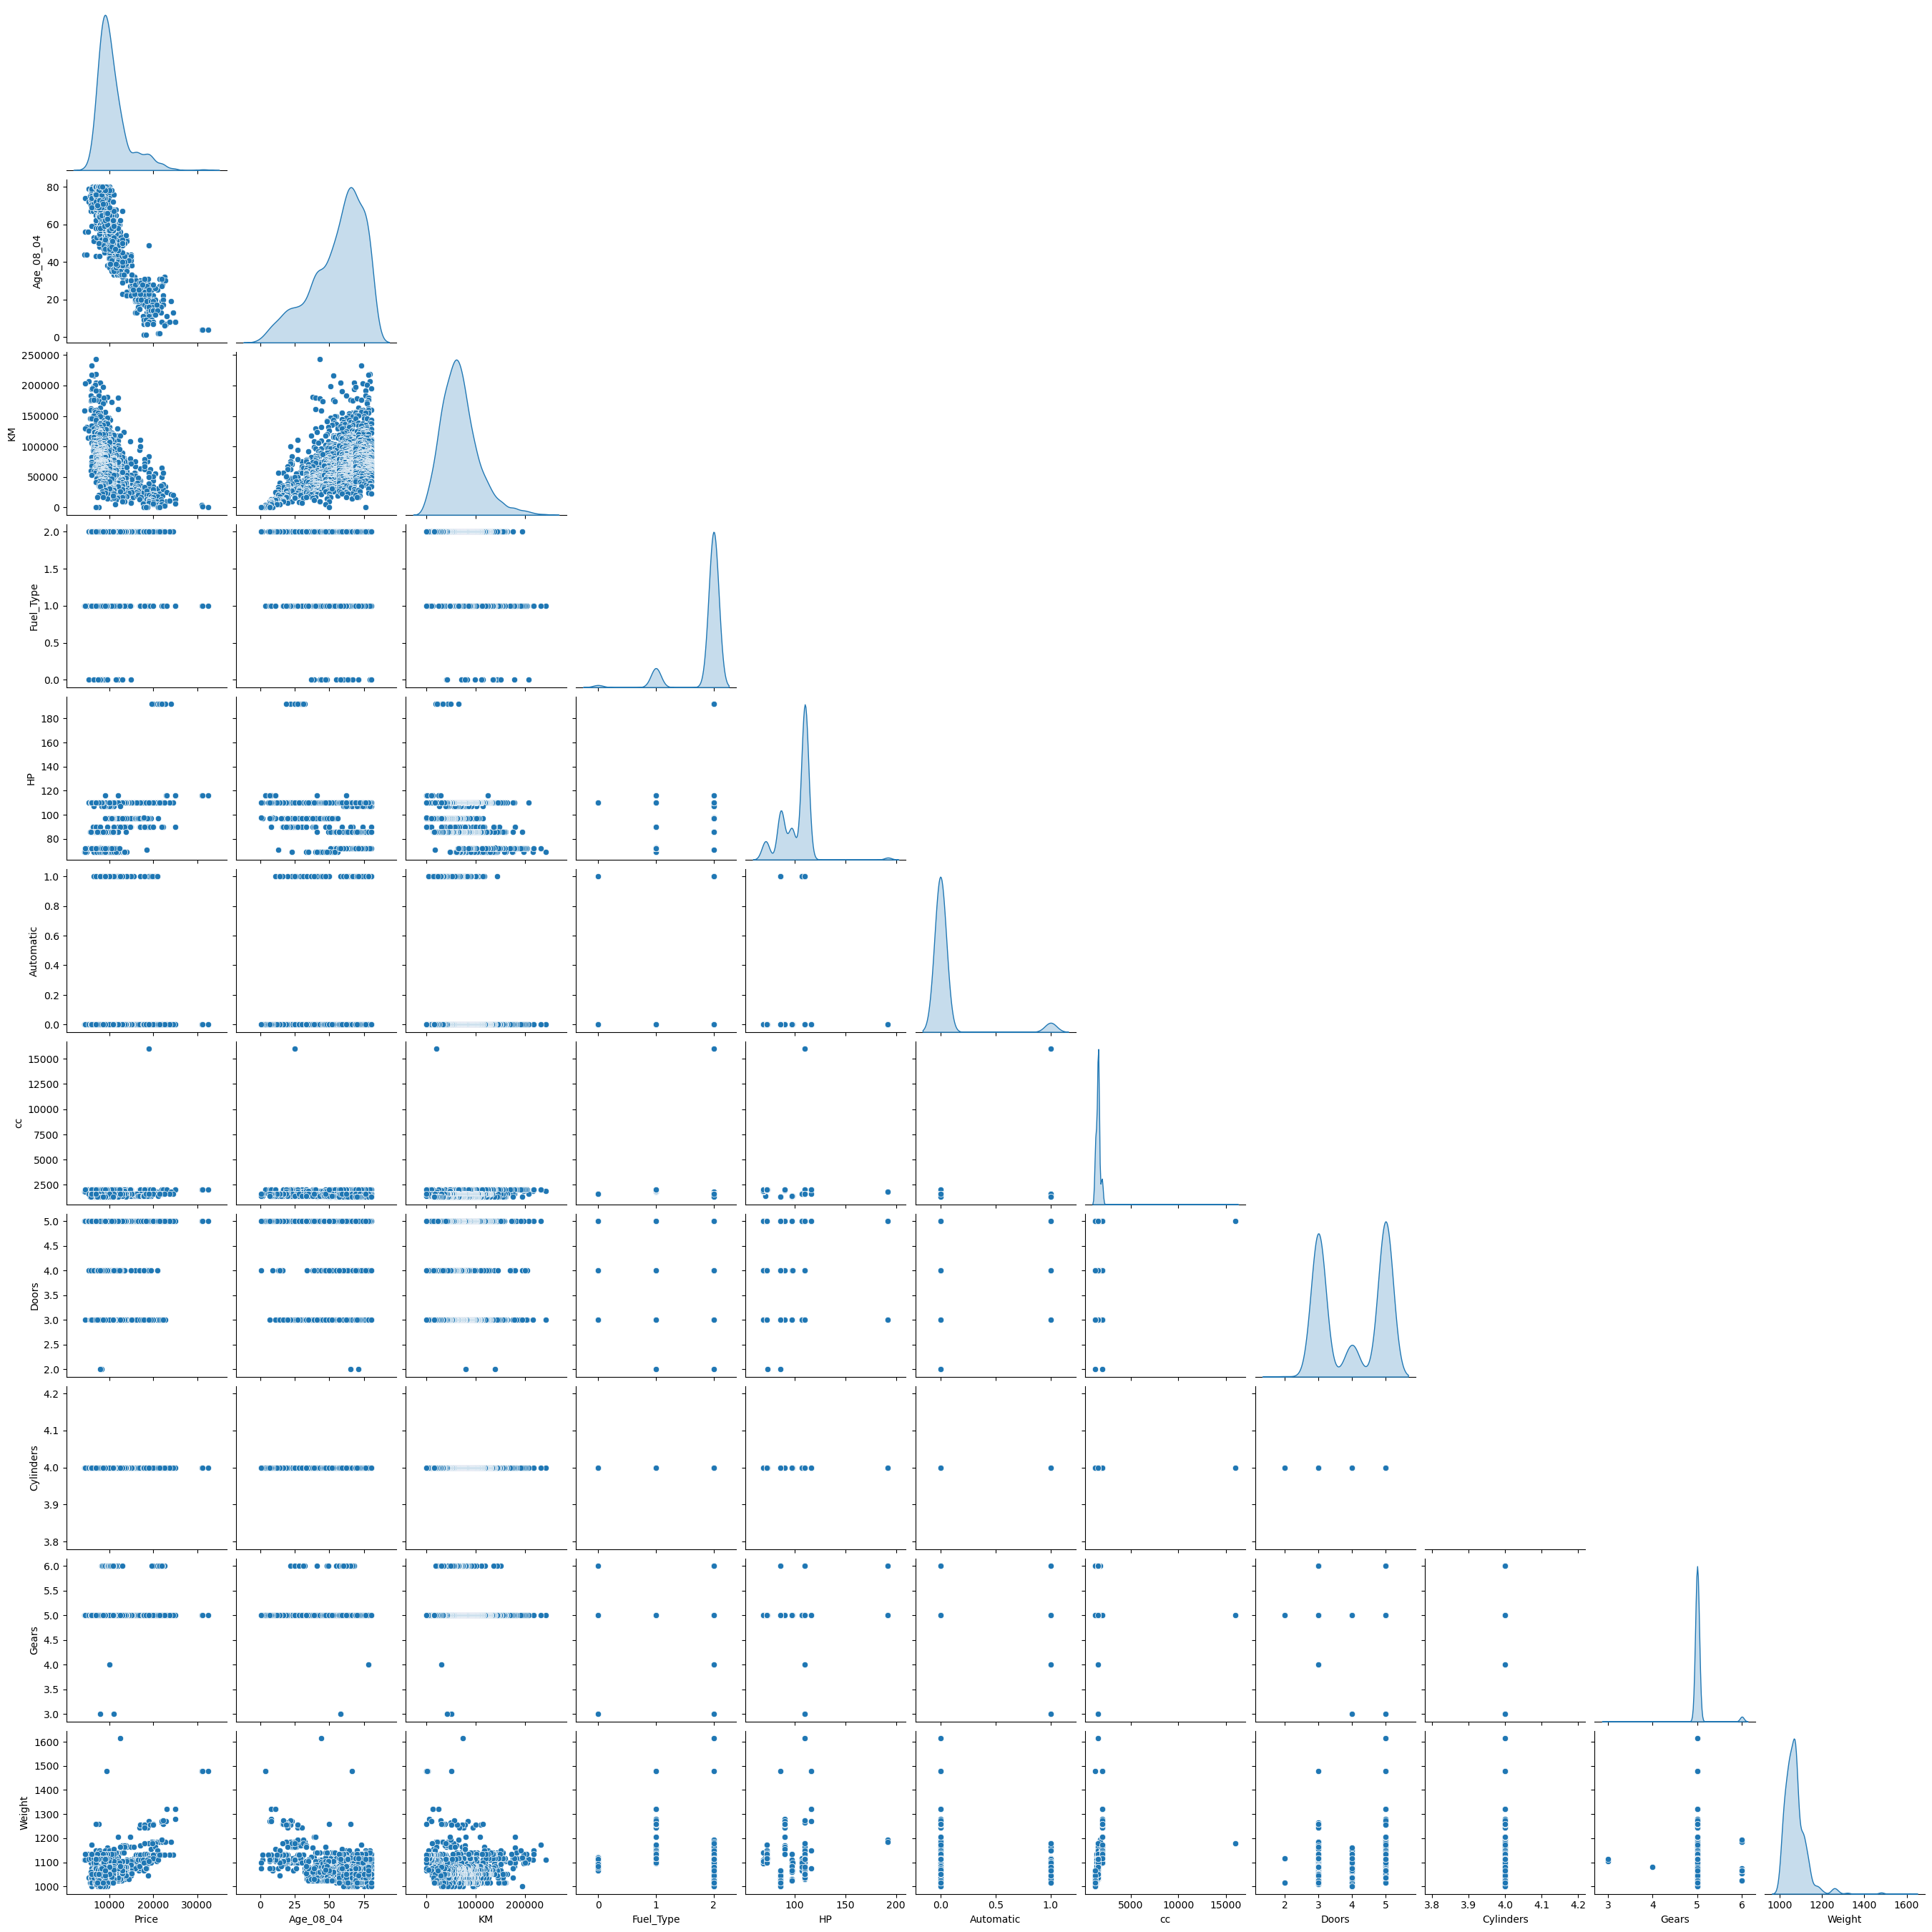

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind = 'kde', corner= True ) #PairPlot For Understanding Features Distribution

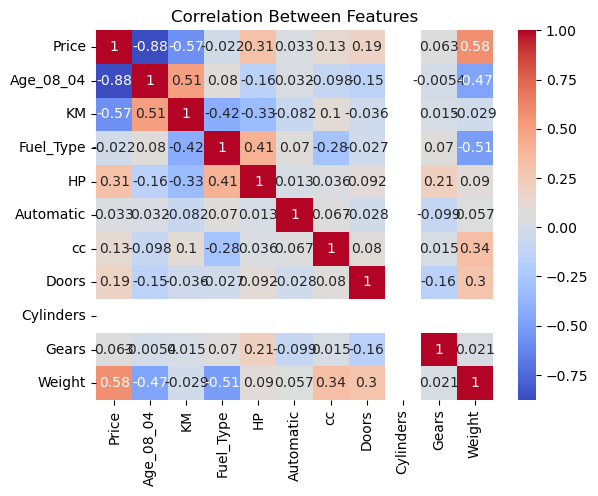

In [8]:
sns.heatmap(df.corr(numeric_only = True), annot = True , cmap = 'coolwarm')
plt.title("Correlation Between Features") #Check Correlations For Prevent To Multicollinearity
plt.show()

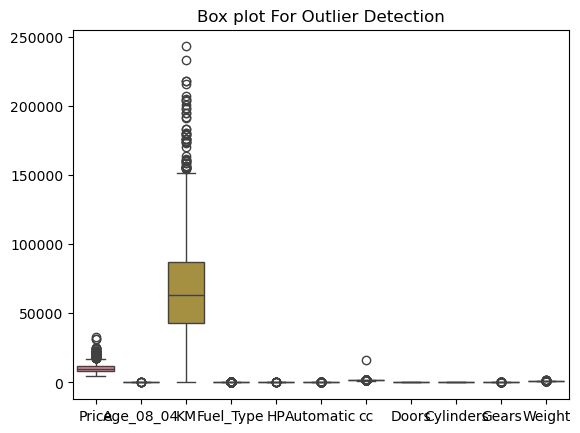

In [9]:
sns.boxplot(df) #For Outlier Detection
plt.title('Box plot For Outlier Detection') 
plt.show()

In [10]:
new_df = df.copy()

for cols in new_df.columns :
    Q1 = new_df[cols].quantile(0.25)
    Q3 = new_df[cols].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers = new_df[(new_df[cols] < lower_bound) | (new_df[cols] > upper_bound)] #Find Outliers 
    print(f"{cols}: {len(outliers)} outliers")

Price: 110 outliers
Age_08_04: 7 outliers
KM: 49 outliers
Fuel_Type: 172 outliers
HP: 11 outliers
Automatic: 80 outliers
cc: 123 outliers
Doors: 0 outliers
Cylinders: 0 outliers
Gears: 46 outliers
Weight: 66 outliers


In [39]:
for cols in new_df.columns :
    Q1 = new_df[cols].quantile(0.25)
    Q3 = new_df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    new_df = new_df[(new_df[cols] >= lower_bound) & (new_df[cols] <= upper_bound)] #Remove Outliers 
   
print(f"New DataFrame Shape{new_df.shape}")
print(f"Orignal DataFrame Shape{df.shape}")

New DataFrame Shape(1012, 11)
Orignal DataFrame Shape(1436, 11)


In [12]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [13]:
X = new_df.drop('Price', axis =1)
X.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
18,24,25563,2,110,0,1600,3,4,5,1065
19,30,64359,2,110,0,1600,3,4,5,1105
20,30,67660,2,110,0,1600,3,4,5,1105
22,28,56349,2,110,0,1600,3,4,5,1120
23,28,32220,2,110,0,1600,3,4,5,1120


In [14]:
y = new_df["Price"]
y.head

<bound method NDFrame.head of 18      16750
19      16950
20      15950
22      15950
23      16950
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1053, dtype: int64>

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #Use Standard Scaler For Scale Data

In [16]:
scaled_X = ss.fit_transform(X)
scaled_X

array([[-2.31410295, -1.47329304,  0.        , ...,  0.        ,
         0.        ,  0.40352152],
       [-1.91994496, -0.0204792 ,  0.        , ...,  0.        ,
         0.        ,  1.9098874 ],
       [-1.91994496,  0.10313505,  0.        , ...,  0.        ,
         0.        ,  1.9098874 ],
       ...,
       [ 0.773468  , -1.79335696,  0.        , ...,  0.        ,
         0.        , -1.47943584],
       [ 0.707775  , -1.79710171,  0.        , ...,  0.        ,
         0.        , -1.47943584],
       [ 1.10193299, -2.43052644,  0.        , ...,  0.        ,
         0.        ,  2.24881973]], shape=(1053, 10))

- 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y , test_size = 0.2 , random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((842, 10), (211, 10), (842,), (211,))

- 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

###### Model 1

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #model 1
model.fit(X_test,y_test)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = model.predict(X_test)

- 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8335346791903011
RMSE: 961.2478249137815


In [21]:
model.coef_

array([-1.67416460e+03, -3.98370778e+02,  1.28466127e-11, -1.64532337e+03,
        1.70530257e-12,  1.55813021e+03, -1.03863890e+02,  0.00000000e+00,
        0.00000000e+00,  6.92951208e+02])

In [22]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coef_df.sort_values(by='Coefficient', ascending=False))

     Feature   Coefficient
5         cc  1.558130e+03
9     Weight  6.929512e+02
2  Fuel_Type  1.284661e-11
4  Automatic  1.705303e-12
7  Cylinders  0.000000e+00
8      Gears  0.000000e+00
6      Doors -1.038639e+02
1         KM -3.983708e+02
3         HP -1.645323e+03
0  Age_08_04 -1.674165e+03


###### Model 2

In [23]:
feature = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors']

In [24]:
x2 = new_df[feature]
scaled_x2 = ss.fit_transform(x2)
x2_train, x2_test, y2_train, y2_test = train_test_split(scaled_x2, y, test_size=0.1, random_state=0)

In [25]:
model2 = LinearRegression()
model2.fit(x2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
y2_pred = model2.predict(x2_test)

In [27]:
print("r2_score:",r2_score(y2_test,y2_pred))
print("Root_mean_squared_error:",np.sqrt(mean_squared_error(y2_test,y2_pred)))

r2_score: 0.8316615673749326
Root_mean_squared_error: 981.5892755781736


In [28]:
coef_df = pd.DataFrame({
    'Feature': x2.columns,
    'Coefficient': model2.coef_
})
print(coef_df.sort_values(by='Coefficient', ascending=False))

     Feature  Coefficient
4         cc   462.568143
5      Doors   210.451005
3  Automatic     0.000000
2         HP  -234.608925
1         KM  -335.059267
0  Age_08_04 -1812.188480


###### Model 3

In [29]:
features = ['Cylinders', 'Gears', 'Weight', 'Fuel_Type']
x3 = new_df[features]
scaled_x3 = ss.fit_transform(x3)
x3_train, x3_test, y3_train, y3_test = train_test_split(scaled_x3,y,test_size=0.2, random_state=0)

In [30]:
model3 = LinearRegression()
model3.fit(x3_train,y3_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y3_pred = model3.predict(x3_test)

In [32]:
print("r2_score:",r2_score(y3_test,y3_pred))
print("Root_mean_squared_error:",np.sqrt(mean_squared_error(y3_test,y3_pred)))

r2_score: 0.22756157309674951
Root_mean_squared_error: 1998.0445692709704


- 5.Apply Lasso and Ridge methods on the model

###### Lasso 

In [33]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv = 5)
lasso.fit(X_train, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [34]:
y_lasso_pred = lasso.predict(X_test)

In [35]:
print("r2_score:",r2_score(y_test,y_lasso_pred))
print("Root_mean_squared_error:",np.sqrt(mean_squared_error(y_test,y_lasso_pred)))

r2_score: 0.8298270482043989
Root_mean_squared_error: 971.8936623422873


###### Ridge

In [36]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv = 5)
ridge.fit(X_train, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [37]:
y_ridge_pred = ridge.predict(X_test)

In [38]:
print("r2_score:",r2_score(y_test,y_ridge_pred))
print("Root_mean_squared_error:",np.sqrt(mean_squared_error(y_test,y_ridge_pred)))

r2_score: 0.8306696904183677
Root_mean_squared_error: 969.4844223835827


### Interview Questions:

- 1.What is Normalization & Standardization and how is it helpful?

- 1. Normalization
    - Definition: Rescales the data between a specific range, typically [0, 1].
    - Formula (Min-Max Normalization): Xnorm = X - Xmin / Xmax - Xmin

- When to Use:
    - When features have different scales and you want them in the same range.
    - Especially useful for distance-based algorithms (like KNN, K-Means, SVM).

- 2. Standardization
    - Definition: Transforms data to have zero mean and unit variance (standard normal distribution).
    -  Formula (Z-score Standardization): Xstd = X - μ / σ

- Where:
    - μ is the mean of the feature
    - σ is the standard deviation

- When to Use:
    - When features have different means and variances
    - Preferred for many ML algorithms: Linear Regression, Logistic Regression, PCA, etc.

- 2.What techniques can be used to address multicollinearity in multiple linear regression?

- Remove highly correlated independent variables using correlation matrix or VIF
- Use Variance Inflation Factor (VIF) to detect multicollinearity
- Apply Standardization to reduce numerical instability
- Use Principal Component Analysis (PCA) to convert correlated variables into uncorrelated components
- Apply Ridge Regression (L2) to shrink coefficients
- Use Lasso Regression (L1) for feature selection
- Use Elastic Net for highly correlated predictors